$$ \frac{d f}{d x} = 2 \pi \cos{[2 \pi x]}, \quad f(0)=0.5. $$

In [135]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE
import math

In [136]:
def samples(batch_size=100, n_inputs=1):
    arr = np.random.rand(batch_size,n_inputs)
    array_tf = tf.convert_to_tensor(arr)
    array_tf = tf.cast(array_tf, tf.float64)
    return array_tf

In [137]:
model = tf.keras.Sequential()
model.add(Dense(8, input_shape=(1,), activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1))

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 8)                 16        
                                                                 
 dense_94 (Dense)            (None, 4)                 36        
                                                                 
 dense_95 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [138]:
N_STEPS = 5000
BATCH_SIZE = 100
opt = Adam(learning_rate=0.02)

hist = []
log_each = 500

for step in range(1, N_STEPS):
    
    X = samples(BATCH_SIZE, 1)
    
    with tf.GradientTape() as tape1:
        # pde loss
        with tf.GradientTape() as tape:
            tape.watch(X)
            pred = model(X)
            
        df_dx = tape.gradient(pred, X)
        pi = tf.constant(math.pi)
        pi = tf.cast(pi, tf.float64)
        pde_loss = MSE(df_dx, 2*pi*tf.math.cos(2*pi*X))
        pde_loss = tf.cast(pde_loss, tf.float64)

        # boundary condition loss
        boundary_loss = MSE(model(tf.convert_to_tensor(np.array((1)).reshape(1,1))), tf.convert_to_tensor(np.array((0.5)).reshape(1,1)))
        
        # total loss
        loss = tf.reduce_mean(pde_loss + boundary_loss)
        
    # update
    grads = tape1.gradient(loss, model.trainable_variables)
    
    opt.apply_gradients(zip(grads, model.trainable_variables))
    
    hist.append(loss)
    if step % log_each == 0:
        tf.print("pde_loss:" , tf.reduce_mean(pde_loss), "  ", "boundary_loss:" , boundary_loss)

pde_loss: 0.0037638518862322073    boundary_loss: [7.6501345930068965e-05]
pde_loss: 0.0052871654061420045    boundary_loss: [7.4854553545833369e-05]
pde_loss: 0.0018302851024830371    boundary_loss: [2.807721060449353e-05]
pde_loss: 0.0015533832974825442    boundary_loss: [4.7956268250715084e-05]
pde_loss: 0.00809642037455789    boundary_loss: [0.00042316086593530144]
pde_loss: 0.0020605352911388379    boundary_loss: [0.0013165005180013623]
pde_loss: 0.00039559099297621219    boundary_loss: [2.5895445929791094e-06]
pde_loss: 0.00033157498607053345    boundary_loss: [2.5022420437892379e-06]
pde_loss: 0.0026203981499735318    boundary_loss: [6.6822107047670443e-05]


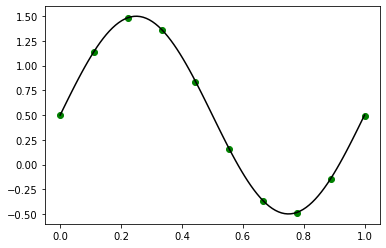

In [139]:
y= model(np.linspace(0,1,10).reshape(-1,1)).numpy().reshape(-1)
plt.scatter(np.linspace(0,1,10), y , c='green')
# actual solution
plt.plot(np.linspace(0,1,100), np.sin(2 * np.pi * np.linspace(0,1,100)) + 0.5, c='black')